# FINAL PROJECT THICKET

In [124]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [125]:
mpi_random_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/Random/*/*.cali"))
mpi_reverse_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/ReverseSorted/*/*.cali"))
mpi_perturbed_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/Perturbed/*/*.cali"))
mpi_sorted_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/Sorted/*/*.cali"))

# CUDA Thicket Variables

In [126]:
cuda_random_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/Random/*/*.cali"))
cuda_reverse_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/ReverseSorted/*/*.cali"))
cuda_perturbed_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/Perturbed/*/*.cali"))
cuda_sorted_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/Sorted/*/*.cali"))

In [127]:
tks = {}

tks["mpi_sorted"] = mpi_sorted_tk
tks["mpi_reverse"] = mpi_reverse_tk
tks["mpi_random"] = mpi_random_tk
tks["mpi_perturbed"] = mpi_perturbed_tk

tks["cuda_sorted"] = cuda_sorted_tk
tks["cuda_reverse"] = cuda_reverse_tk
tks["cuda_random"] = cuda_random_tk
tks["cuda_perturbed"] = cuda_perturbed_tk


In [128]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["cuda_random"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [129]:
# Performance data
for inputType in tks.keys():
    if "mpi" in inputType:
        tks[inputType].metadata["values_per_proc"] = tks[inputType].metadata["InputSize"] // tks[inputType].metadata["num_procs"]
tks["mpi_random"].dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              121569189     1   
                                                  145562348     1   
                                                  243974900     1   
                                                  244497352     1   
                                                  264763655     1   
                                                  267352453     1   
                                                  396802262     1   
                                                  406565177     1   
                                                  446143504     1   
                                                  573174663     1   
                                                  602627586     1   
                                                  712356224     1   
                                                  788286055     1   
                                                  791511023     1   
                                                  833366394     1   
                                                  907490309     1   
                                                  1017750183    1   
                                                  1049476715    1   
                                                  1171058059    1   
                                                  1201325766    1   
                                                  1300094249    1   
                                                  1382228857    1   
                                                  1424530190    1   
                                                  1447575159    1   
                                                  1475700261    1   
                                                  1510294426    1   
                                                  1545827220    1   
                                                  1554490782    1   
                                                  1555012850    1   
                                                  1614797389    1   
                                                  1628075355    1   
                                                  1654942197    1   
                                                  1756589640    1   
                                                  1815547707    1   
                                                  1867975594    1   
                                                  1939688023    1   
                                                  1954467605    1   
                                                  2011269404    1   
                                                  2103478004    1   
                                                  2222205902    1   
                                                  2239453462    1   
                                                  2289775128    1   
                                                  2291385317    1   
                                                  2332591192    1   
                                                  2375951346    1   
                                                  2506020778    1   
                                                  2515942954    1   
                                                  2608499705    1   
                                                  2614743939    1   
                                                  2677243835    1   
                                                  2709465597    1   
                                                  2760421031    1   
                                                  2856044889    1   
                                                  2925695988    1   
                                                  2955781570    1   
                                                  3097490828    1   
                                                  3136270459

In [130]:
tks.keys()

dict_keys(['mpi_sorted', 'mpi_reverse', 'mpi_random', 'mpi_perturbed', 'cuda_sorted', 'cuda_reverse', 'cuda_random', 'cuda_perturbed'])

In [131]:
gbs = {}

for i in tks.keys():
    if "mpi" in i:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("values_per_proc")
    else:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("num_blocks")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afa1cc83f70>, 262144: <thicket.thicket.Thicket object at 0x2afa14a42ac0>, 1048576: <thicket.thicket.Thicket object at 0x2afa1d582d90>, 4194304: <thicket.thicket.Thicket object at 0x2afa1c638910>, 16777216: <thicket.thicket.Thicket object at 0x2afa1d74c5e0>, 67108864: <thicket.thicket.Thicket object at 0x2afa149bea30>, 268435456: <thicket.thicket.Thicket object at 0x2afa1491abb0>}
22  thickets created...
{64: <thicket.thicket.Thicket object at 0x2afa17f01370>, 128: <thicket.thicket.Thicket object at 0x2afa14834730>, 256: <thicket.thicket.Thicket object at 0x2afa1cafba30>, 512: <thicket.thicket.Thicket object at 0x2afa1c36ab80>, 1024: <thicket.thicket.Thicket object at 0x2afa1480f580>, 2048: <thicket.thicket.Thicket object at 0x2afa14a40250>, 4096: <thicket.thicket.Thicket object at 0x2afa1c9f6100>, 8192: <thicket.thicket.Thicket object at 0x2afa14253970>, 16384: <thicket.thicket.Thicket object at 0x2afa1d4d0820>, 32768

17  thickets created...
{16: <thicket.thicket.Thicket object at 0x2afa1c73e700>, 32: <thicket.thicket.Thicket object at 0x2afa1cbe56a0>, 64: <thicket.thicket.Thicket object at 0x2afa1d410b50>, 128: <thicket.thicket.Thicket object at 0x2afa1d8f0400>, 256: <thicket.thicket.Thicket object at 0x2afa1dc32a00>, 512: <thicket.thicket.Thicket object at 0x2afa149c4a90>, 1024: <thicket.thicket.Thicket object at 0x2afa149d89a0>, 2048: <thicket.thicket.Thicket object at 0x2afa15275be0>, 4096: <thicket.thicket.Thicket object at 0x2afa17cf1850>, 8192: <thicket.thicket.Thicket object at 0x2afa1dcfb490>, 16384: <thicket.thicket.Thicket object at 0x2afa1f800130>, 32768: <thicket.thicket.Thicket object at 0x2afa1e46dd90>, 65536: <thicket.thicket.Thicket object at 0x2afa1d7f9b20>, 131072: <thicket.thicket.Thicket object at 0x2afa1dedbee0>, 262144: <thicket.thicket.Thicket object at 0x2afa1f2e4610>, 524288: <thicket.thicket.Thicket object at 0x2afa1d7e3250>, 1048576: <thicket.thicket.Thicket object at 0x2

Compose these 3 groups column-wise to get a holistic view of the data

In [132]:
print(gbs.keys())

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])


In [137]:
ctks = {}

for i in gbs.keys():
#     if "strong" in i:
    if "mpi" in i:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_procs"
        )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_threads"
        )
        
valsPerProcList = ctks["mpi_random_weak"].dataframe.columns.get_level_values(0).unique().drop("name")
valsPerBlockList = ctks["cuda_random_weak"].dataframe.columns.get_level_values(0).unique().drop("name")

In [138]:
for i in ctks.keys():
    if "cuda" in i:
        if "strong" in i:
            for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

        else:
            for valPerBlock in valsPerBlockList: #[32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(valPerBlock, "nid"), (valPerBlock, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

    else:
        if "strong" in i:
            for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            
        else: 
            for valPerProc in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                ctks[i].dataframe = ctks[i].dataframe.drop([(valPerProc, "nid"), (valPerProc, "spot.channel")], axis=1)

            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [141]:
# mpi_strong_random_ctk.dataframe

ctks["cuda_sorted_weak"].dataframe

16                              \
                              Min time/rank Max time/rank Avg time/rank   
name              num_threads                                             
main              64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
                  2048                  NaN           NaN           NaN   
                  4096             0.457426      0.457426      0.457426   
comm              64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
                  2048                  NaN           NaN           NaN   
                  4096             0.000181      0.000181      0.000181   
comm_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
                  2048                  NaN           NaN           NaN   
                  4096             0.000169      0.000169      0.000169   
cudaMemcpy        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
                  2048                  NaN           NaN           NaN   
                  4096             0.000155      0.000155      0.000155   
comp              64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
                  2048                  NaN           NaN           NaN   
                  4096             0.000054      0.000054      0.000054   
comp_large        64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
                  2048                  NaN           NaN           NaN   
                  4096             0.000035      0.000035      0.000035   
correctness_check 64                    NaN           NaN           NaN   
                  128                   NaN           NaN           NaN   
                  256                   NaN           NaN           NaN   
                  512                   NaN           NaN           NaN   
                  1024                  NaN           NaN           NaN   
                  2048                  NaN           NaN           NaN   
                  4096             0.000391      0.000391      0.000391   
data_init         64                    NaN           NaN           NaN   
                  128                   NaN           NaN         

Perform pandas operations to get the table in a desirable format for plotting

In [142]:
# for i in ctks.keys():
#     if "cuda" in i:
#         for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
#             ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
#         ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
#         ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

#     else:
#         for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
#             ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)

#         ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
#         ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [143]:
ctks["mpi_sorted_strong"].dataframe

65536                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.504291      0.504758      0.504525   
                  4              0.641779      0.644326      0.643522   
                  8              0.497369      0.501218      0.500232   
                  16             0.780881      0.785008      0.783347   
                  32             1.680443      1.681684      1.681180   
                  64             3.069992      3.073516      3.071510   
                  128            2.900974      3.009682      2.954019   
                  256            3.351819      3.462324      3.399503   
                  512            4.074387      4.245160      4.163588   
                  1024           5.868611      6.032459      5.956222   
comm              2              0.000973      0.003876      0.002424   
                  4              0.005910      0.011546      0.008326   
                  8              0.003424      0.009669      0.005228   
                  16             0.004862      0.010584      0.006619   
                  32             0.051604      0.057822      0.053653   
                  64             0.020066      0.051038      0.036645   
                  128            0.026911      0.067052      0.053850   
                  256            0.038738      0.106660      0.073024   
                  512            0.068960      0.209478      0.144053   
                  1024           0.119518      0.615185      0.302833   
MPI_Barrier       2              0.000657      0.002427      0.001542   
                  4              0.003603      0.004218      0.004057   
                  8              0.001750      0.003200      0.002379   
                  16             0.003724      0.005687      0.004659   
                  32             0.049720      0.050746      0.050498   
                  64             0.002361      0.032968      0.019626   
                  128            0.000977      0.037631      0.026341   
                  256            0.004232      0.053890      0.038218   
                  512            0.005122      0.139798      0.080837   
                  1024           0.005293      0.492924      0.187247   
comm_large        2              0.000221      0.000716      0.000468   
                  4              0.001586      0.005018      0.003340   
                  8              0.000336      0.005769      0.002542   
                  16             0.000562      0.005355      0.001674   
                  32             0.000975      0.006671      0.002780   
                  64             0.013482      0.018306      0.014133   
                  128            0.023704      0.030511      0.025533   
                  256            0.028774      0.037265      0.031938   
                  512            0.052107      0.069284      0.059021   
                  1024           0.096023      0.124691      0.107582   
MPI_Recv          2              0.000111      0.000613      0.000362   
                  4              0.000192      0.004525      0.002634   
                  8              0.000124      0.005651      0.002368   
                  16             0.000207      0.005175      0.001353   
                  32             0.000339      0.006345      0.002216   
                  64             0.011215      0.017699      0.012424   
                  128            0.018932      0.029352      0.023222   
                  256            0.024453      0.034639      0.027619   
                  512            0.042910      0.064856      0.050434   
                  1024           0.076946      0.115664      0.090845   
MPI_Send          2              0.000087      0.000090      0.000088   
                  4              0.000067      0.001334      0.000660   
                  8  

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [144]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

# Examples

In [145]:
ctks["mpi_random_strong"].dataframe.loc["main"][262144]

Min time/rank  Max time/rank  Avg time/rank   Total time  \
num_procs                                                             
2               0.544036       0.545587       0.544811     1.089623   
4               0.419941       0.434451       0.430287     1.721148   
8               0.546793       0.554654       0.552645     4.421164   
16              0.798738       0.803839       0.801991    12.831850   
32              1.448989       1.459328       1.454063    46.530021   
64              2.693941       2.759892       2.727405   174.553951   
128             2.941163       3.050484       2.995245   383.391349   
256             3.661802       3.772900       3.715069   951.057552   
512             8.067770       8.716865       8.525207  4364.905964   
1024            6.625018       6.751135       6.680800  6841.138929   

           Variance time/rank  
num_procs                      
2                    0.000001  
4                    0.000036  
8                    0.000005  
16                   0.000001  
32                   0.000007  
64                   0.000187  
128                  0.000627  
256                  0.000429  
512                  0.032467  
1024                 0.001035

In [146]:
ctks.keys()

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])

In [147]:
# function_names = ("main", "comp", "comm", "comm_small", "comm_large", "comp_small", "comp_large")
function_names = ("main", "comm", "comp_large")
# function_names = set(ctks["mpi_strong_perturbed"].dataframe.index.get_level_values("name"))

# MPI STRONG SCALING TIME PLOTS

        sorted   reverse    random  perturbed
2     1.994042  1.994342  2.111359   1.994686
4     2.868641  2.864276  2.975754   2.868363
8     3.207233  3.202108  3.272589   3.209703
16    3.293335  3.288963  3.323230   3.292424
32    3.278027  3.281310  3.278866   3.271547
64    5.991568  6.005150  5.952056   6.001487
128   5.298035  5.313459  5.197721   5.288569
256   4.234753  4.229539  4.242933   4.268875
512   2.963707  2.963620  2.997196   2.971883
1024  2.558420  2.556121  2.583551   2.553378


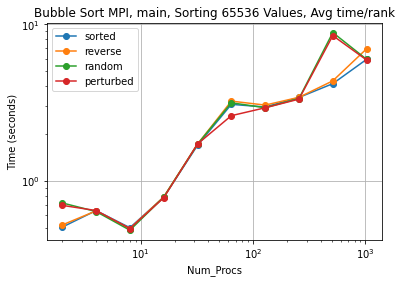

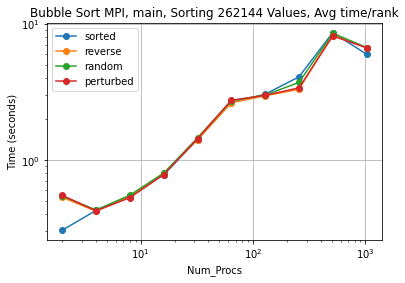

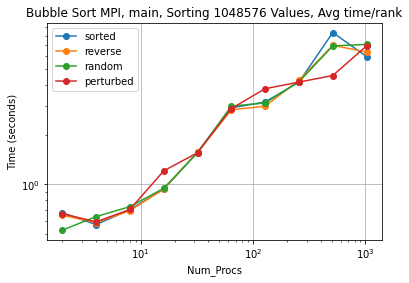

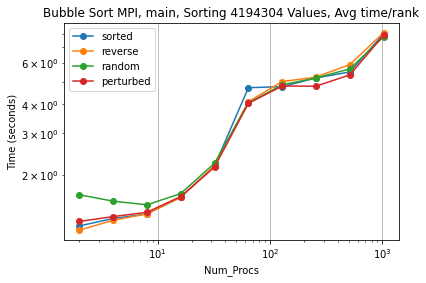

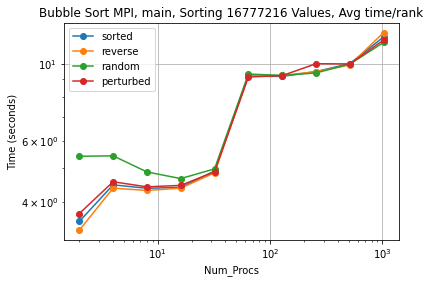

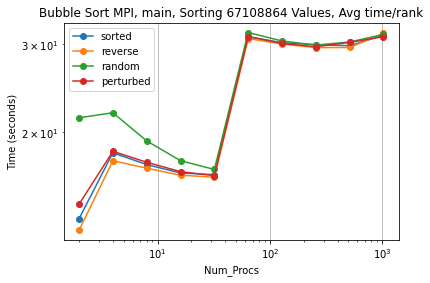

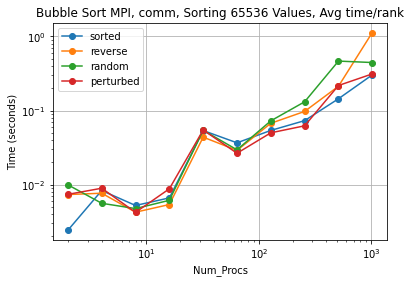

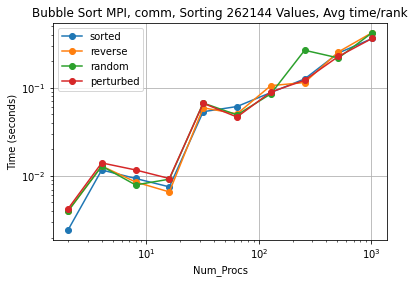

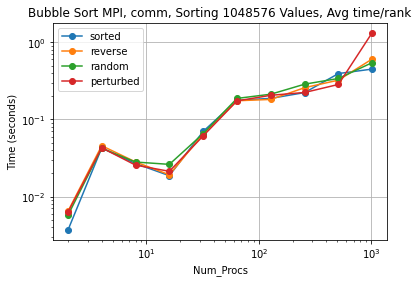

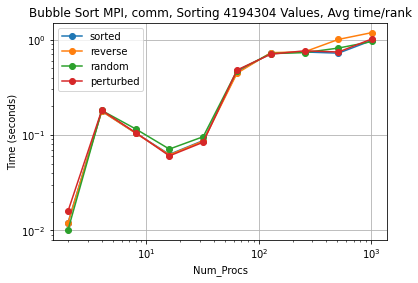

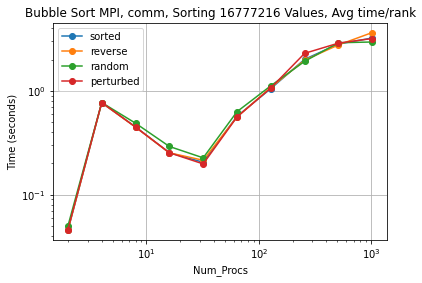

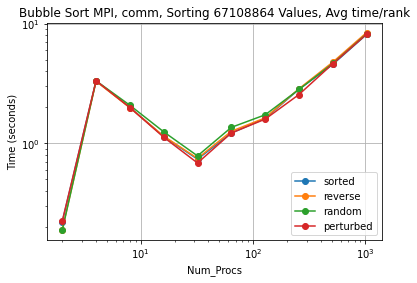

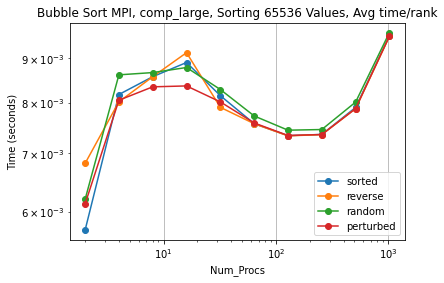

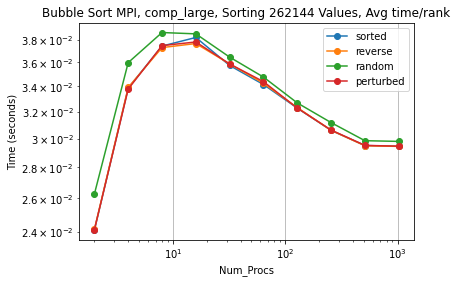

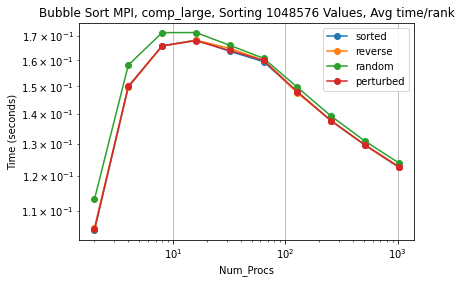

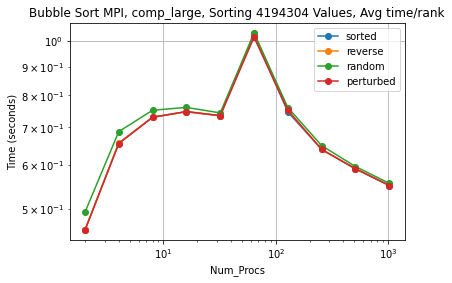

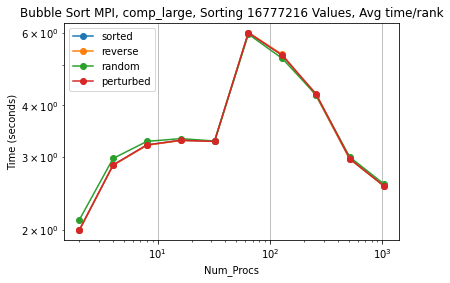

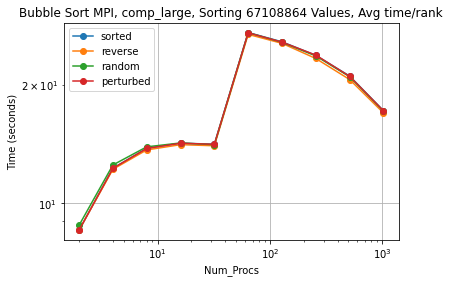

In [148]:
for name in function_names:
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "mpi" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        if inputSize == 16777216 and name == "comp_large":
            print(masterDF)
            
        plot_pandas(
            df=masterDF,
            title="Bubble Sort MPI, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

# MPI WEAK SCALING TIME PLOTS

        4096      8192      16384     32768      65536      131072     262144  \
2          NaN       NaN       NaN  0.006195        NaN   0.026264        NaN   
4          NaN       NaN  0.008616  0.022426   0.035972   0.098837   0.158117   
8          NaN  0.008668  0.023575  0.038656   0.103714   0.171409   0.459232   
16    0.008785  0.022558  0.038534  0.102375   0.171455   0.457360   0.760347   
32    0.021767  0.036448  0.099668  0.166095   0.601999   0.743311   3.356202   
64    0.034749  0.093032  0.160802  0.463043   1.032544   2.970516   5.952056   
128   0.086985  0.149615  0.405062  0.759992   2.637738   5.197721  14.816567   
256   0.139220  0.372674  0.649322  1.878594   4.242933  13.083116  23.681078   
512   0.347487  0.595733  1.616436  2.997196  10.695292  20.968512        NaN   
1024  0.555753       NaN  2.583551       NaN  17.147651        NaN        NaN   

         524288  
2      0.113275  
4      0.432428  
8      0.751582  
16     2.015224  
32     3.278866  


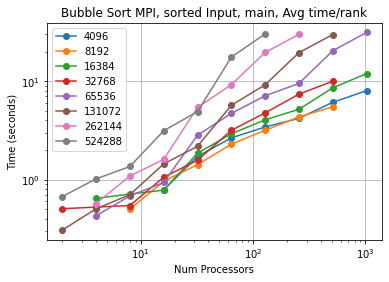

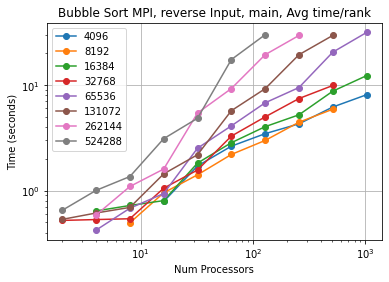

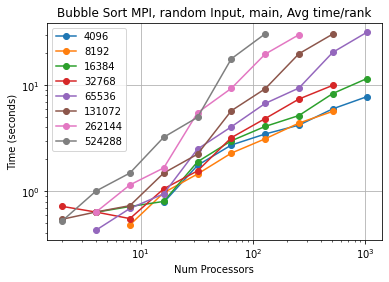

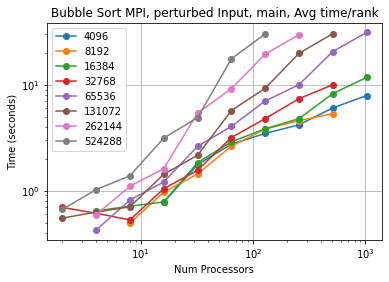

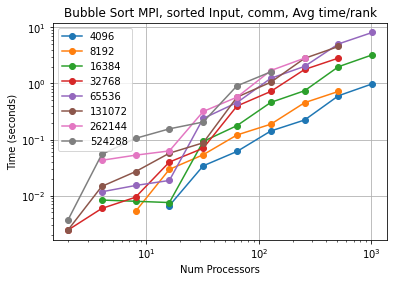

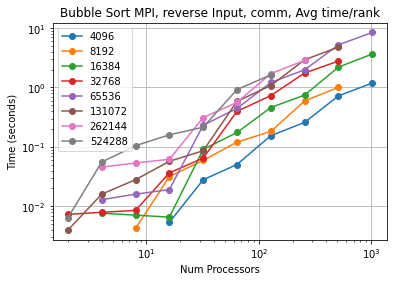

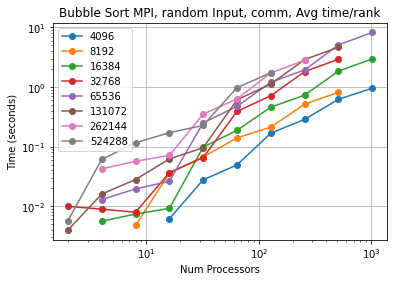

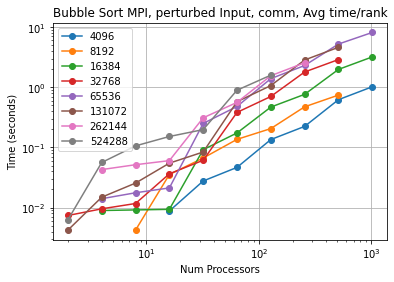

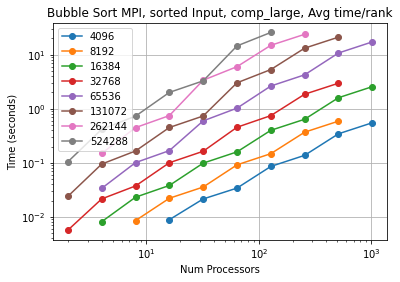

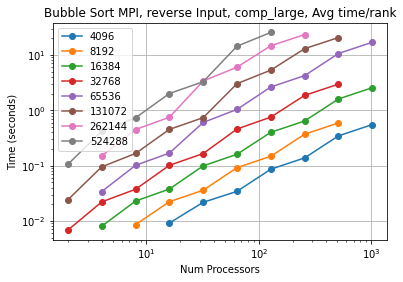

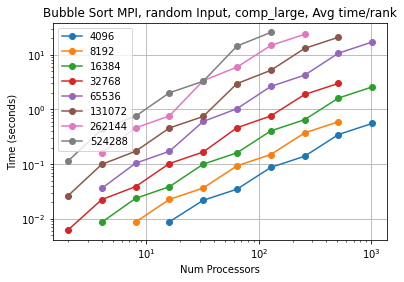

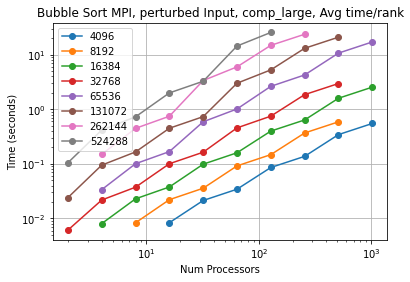

In [155]:
def count_nan(arr):
    count = 0
    for k in arr:
        if k >= 0:
            count += 1
    return count

for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "mpi" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]: #[262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0]: #[256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0, 16384.0, 32768.0, 65536.0, 131072.0, 262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0, 8388608.0, 16777216.0, 33554432.0, 67108864.0, 134217728.0]: # for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                    
                if(count_nan(tempDF.values) > 3):
                    tempDF = tempDF.rename(inputSize)    
                    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
            masterDF = masterDF.apply(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))
        
            if inputType == "mpi_random_weak" and name == "comp_large":
                print(masterDF)
        
            plot_pandas(
                df=masterDF,
                title="Bubble Sort MPI, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num Processors",
                ylabel="Time (seconds)",
                loglog=True
            )

# CUDA STRONG SCALING TIME PLOTS

        sorted   reverse    random  perturbed
64    0.432239  0.419795  0.481436   0.423097
128   0.491500  0.489346  0.487483   0.450229
256   0.434503  0.475819  0.450190   0.432270
512   0.492403  0.469455  0.447059   0.455948
1024  0.458407  0.468803  0.442268   0.445180
2048  0.000044  0.000125  0.000029   0.000055
4096  0.000031  0.000042  0.000035   0.000063


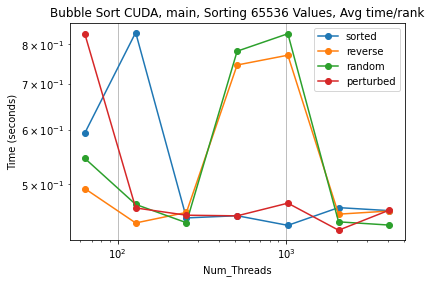

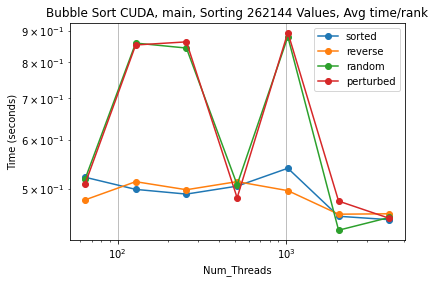

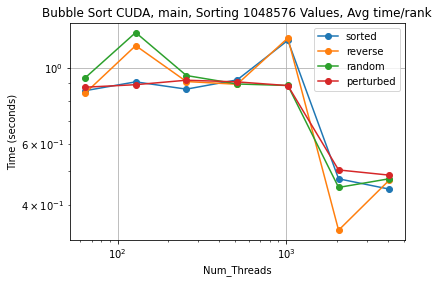

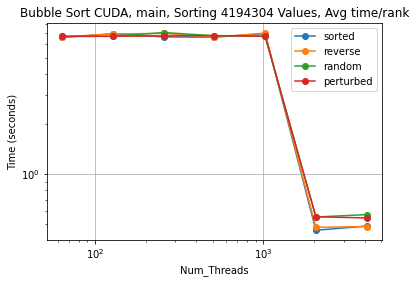

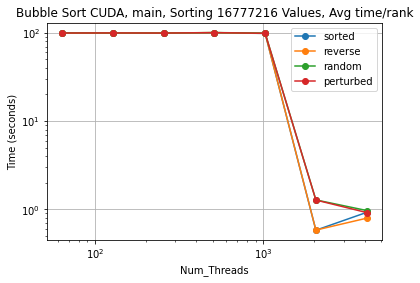

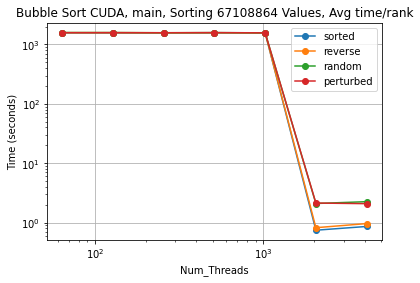

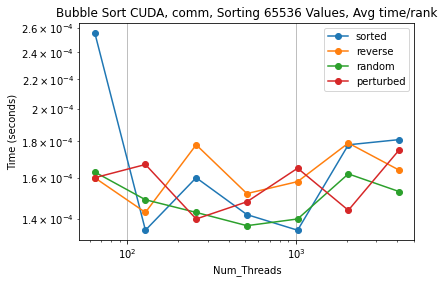

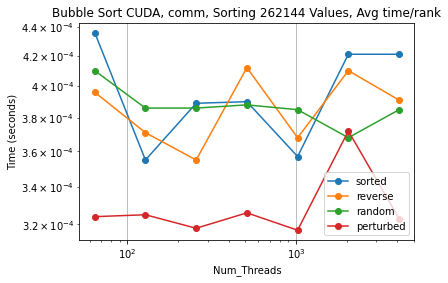

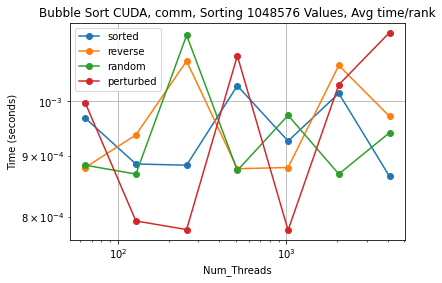

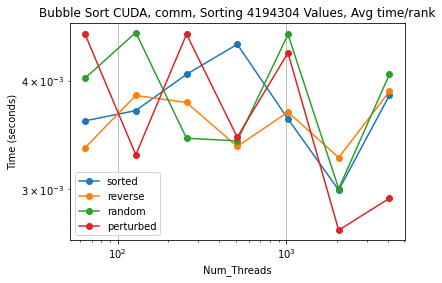

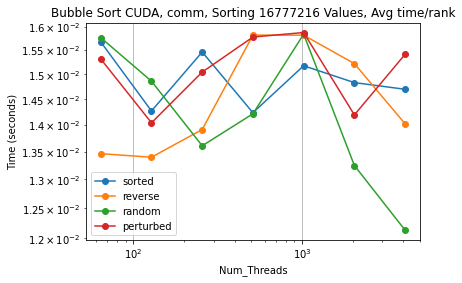

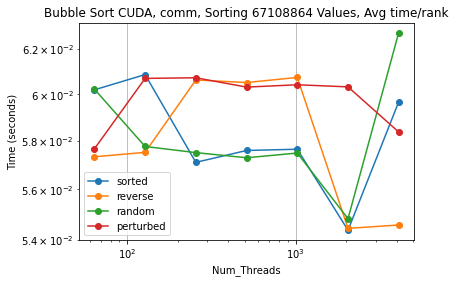

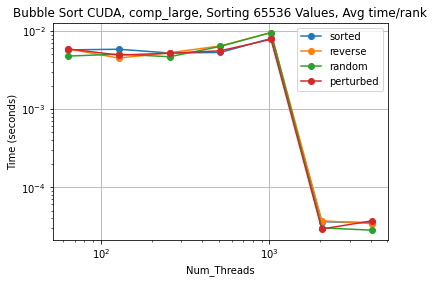

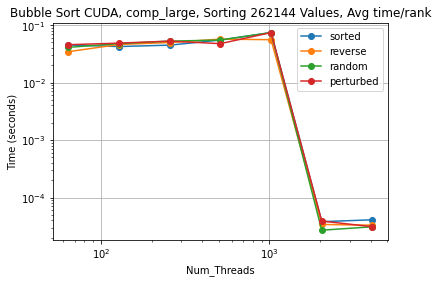

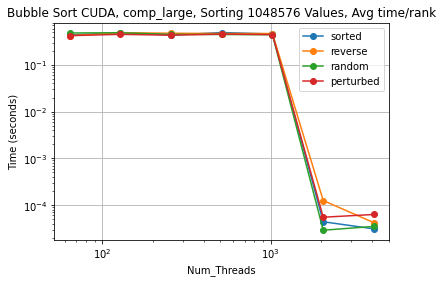

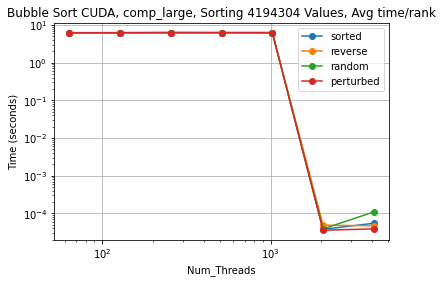

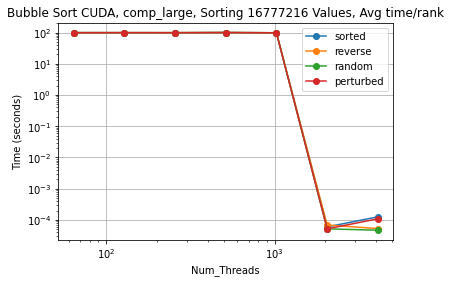

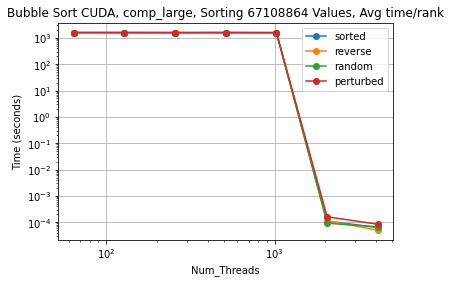

In [156]:
for name in function_names:
    for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "cuda" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 
                
        if inputSize == 2**20 and name == "comp_large":
            print(masterDF)

        plot_pandas(
            df=masterDF,
            title="Bubble Sort CUDA, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Threads",
            ylabel="Time (seconds)",
            loglog=True
        )

# CUDA WEAK SCALING TIME PLOTS

        256       512       1024      2048      4096      8192       16384   \
64         NaN       NaN  0.004764       NaN  0.040979       NaN   0.481436   
128        NaN  0.005046  0.028666  0.047576  0.245584  0.487483   3.372804   
256   0.004670  0.029974  0.052569  0.247317  0.450190  3.361414   6.264172   
512   0.039437  0.054902  0.247418  0.447059  3.326453  6.235345  52.238638   
1024  0.074204  0.027466  0.442268  0.223549  6.202716  3.117698  98.213103   
2048  0.037119  0.000029  0.221189  0.000039  3.101382  0.000052  49.106585   
4096  0.000035       NaN  0.000110       NaN  0.000047       NaN   0.000067   

         32768        65536        131072  
64          NaN     6.181940          NaN  
128    6.192784    52.381189    98.848785  
256   52.980905    98.580437   839.411431  
512   99.769025   833.936492  1579.974078  
1024  49.884558  1569.292547   789.987083  
2048   0.000092   784.646319     0.000089  
4096        NaN     0.000090          NaN  


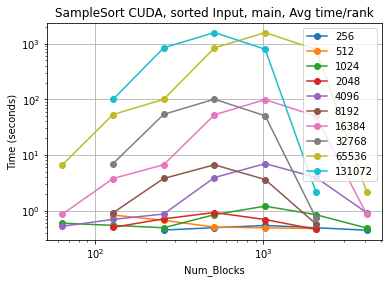

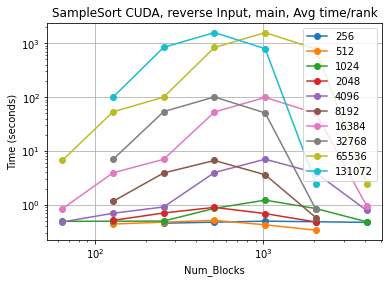

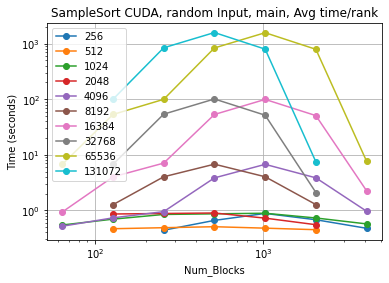

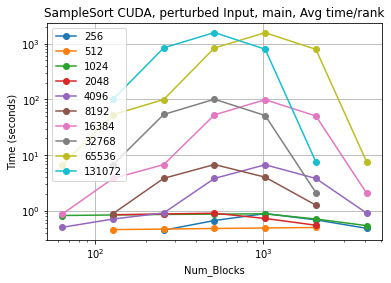

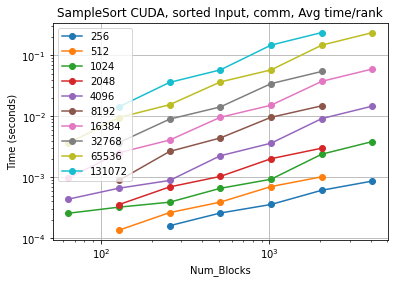

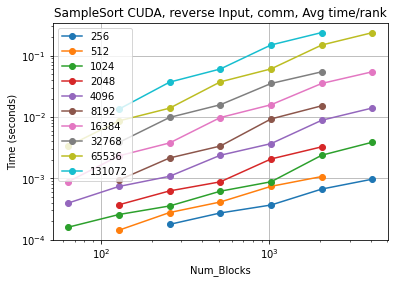

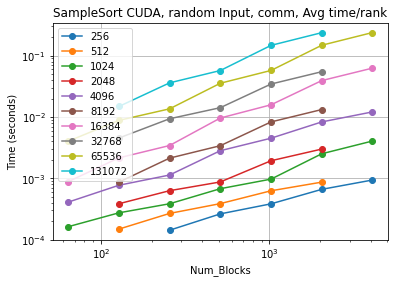

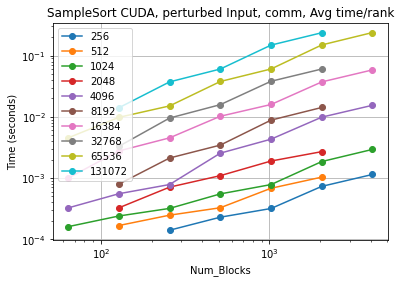

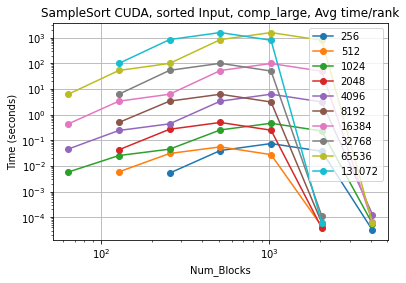

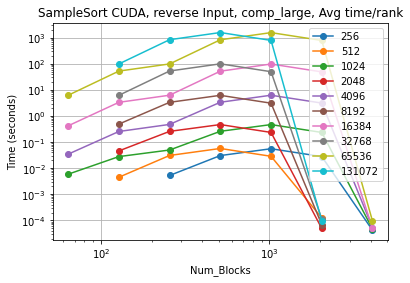

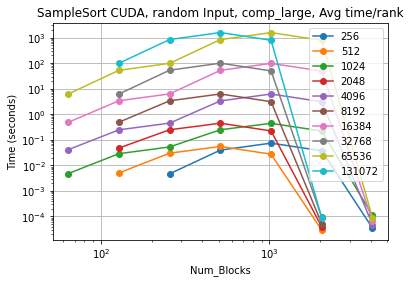

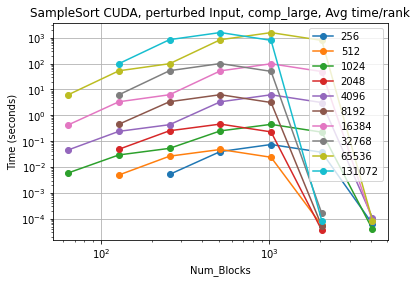

In [159]:
def count_nan(arr):
    count = 0
    for k in arr:
        if k >= 0:
            count += 1
    return count

for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "cuda" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in valsPerBlockList: #[32768, 65536, 131072, 262144, 524288, 1048576, 2097152]: #[64, 128, 256, 512, 1024]: 
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                
                if(count_nan(tempDF.values) > 2):
                    tempDF = tempDF.rename(inputSize)    
                    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
            masterDF = masterDF.apply(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))
        
            if inputType == "cuda_random_weak" and name == "comp_large":
                    print(masterDF)

            plot_pandas(
                df=masterDF,
                title="SampleSort CUDA, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num_Blocks",
                ylabel="Time (seconds)",
                loglog=True
            )

## Speedup

[1.0, 0.7030852196167674, 0.6324369534545377, 0.6182120909104507, 0.6247647848269979, 0.32457291833926916, 0.34339859211179097, 0.37173632889516267, 0.41982554603779226, 0.513371598243981]


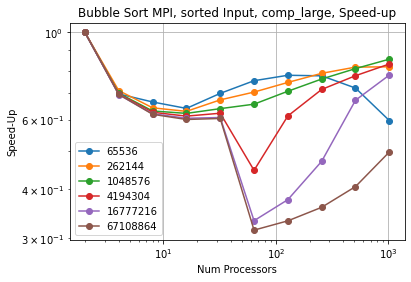

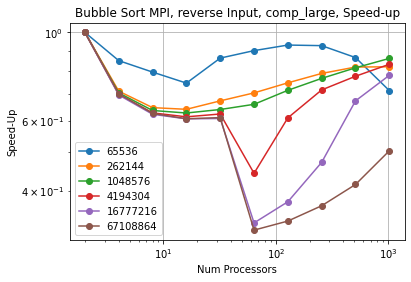

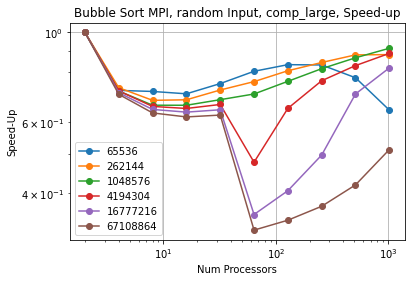

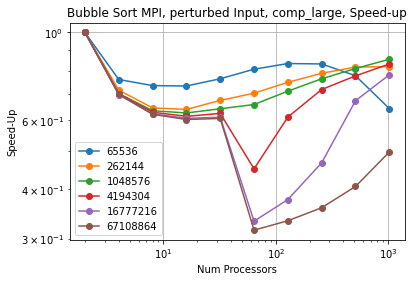

In [160]:
for inputType in ctks.keys():
    if("mpi" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
            tempDF = ctks[inputType].dataframe.loc["comp_large"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][2] / masterDF[inputSize]
        
        if "random" in inputType:
            print(list(masterDF[67108864]))

        plot_pandas(
            df=masterDF,
            title="Bubble Sort MPI, " + str(inputType.split("_")[1]) + " Input, comp_large, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )

[1.0, 0.7376129322497424, 0.9834261132269589, 1.0406609807626668, 1.0512474956561326, 2.07916043582812, 1.9618166830687964]


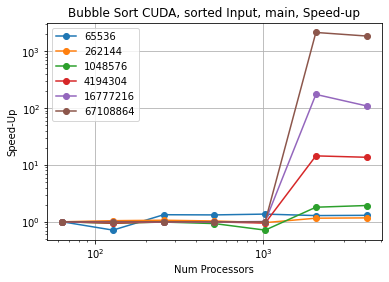

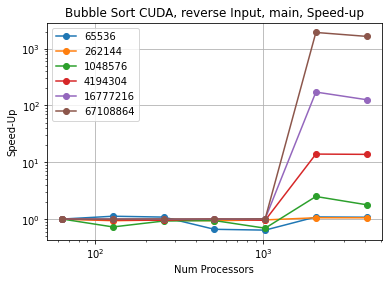

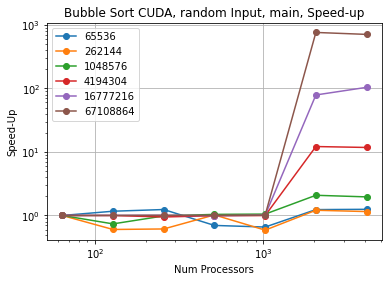

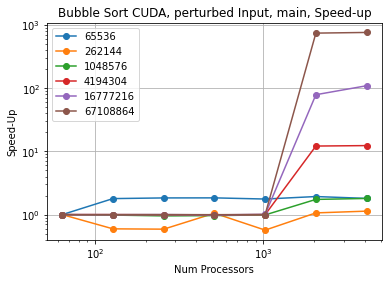

In [161]:
for inputType in ctks.keys():
    if("cuda" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
            tempDF = ctks[inputType].dataframe.loc["main"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][64] / masterDF[inputSize]

                        
        if "random" in inputType:
            print(list(masterDF[1048576]))

        plot_pandas(
            df=masterDF,
            title="Bubble Sort CUDA, " + str(inputType.split("_")[1]) + " Input, main, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )